In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2
import xarray as xr
import pandas as pd
import numpy as np
import calendar as cld
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
from scipy.interpolate import griddata # Other package for regridding
from scipy.stats import genextreme as gev

# Import some extra functions from utils folder
import sys
sys.path.insert(1, '/home/philinat') # to include the util directory
# #import utils as u # my personal functions
# u.check_python_version()
# u.check_virtual_memory()

In [2]:
ds = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA-20C/MARgrid_EUf.nc')
normal_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':True, 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}
multiplot_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':False, 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}

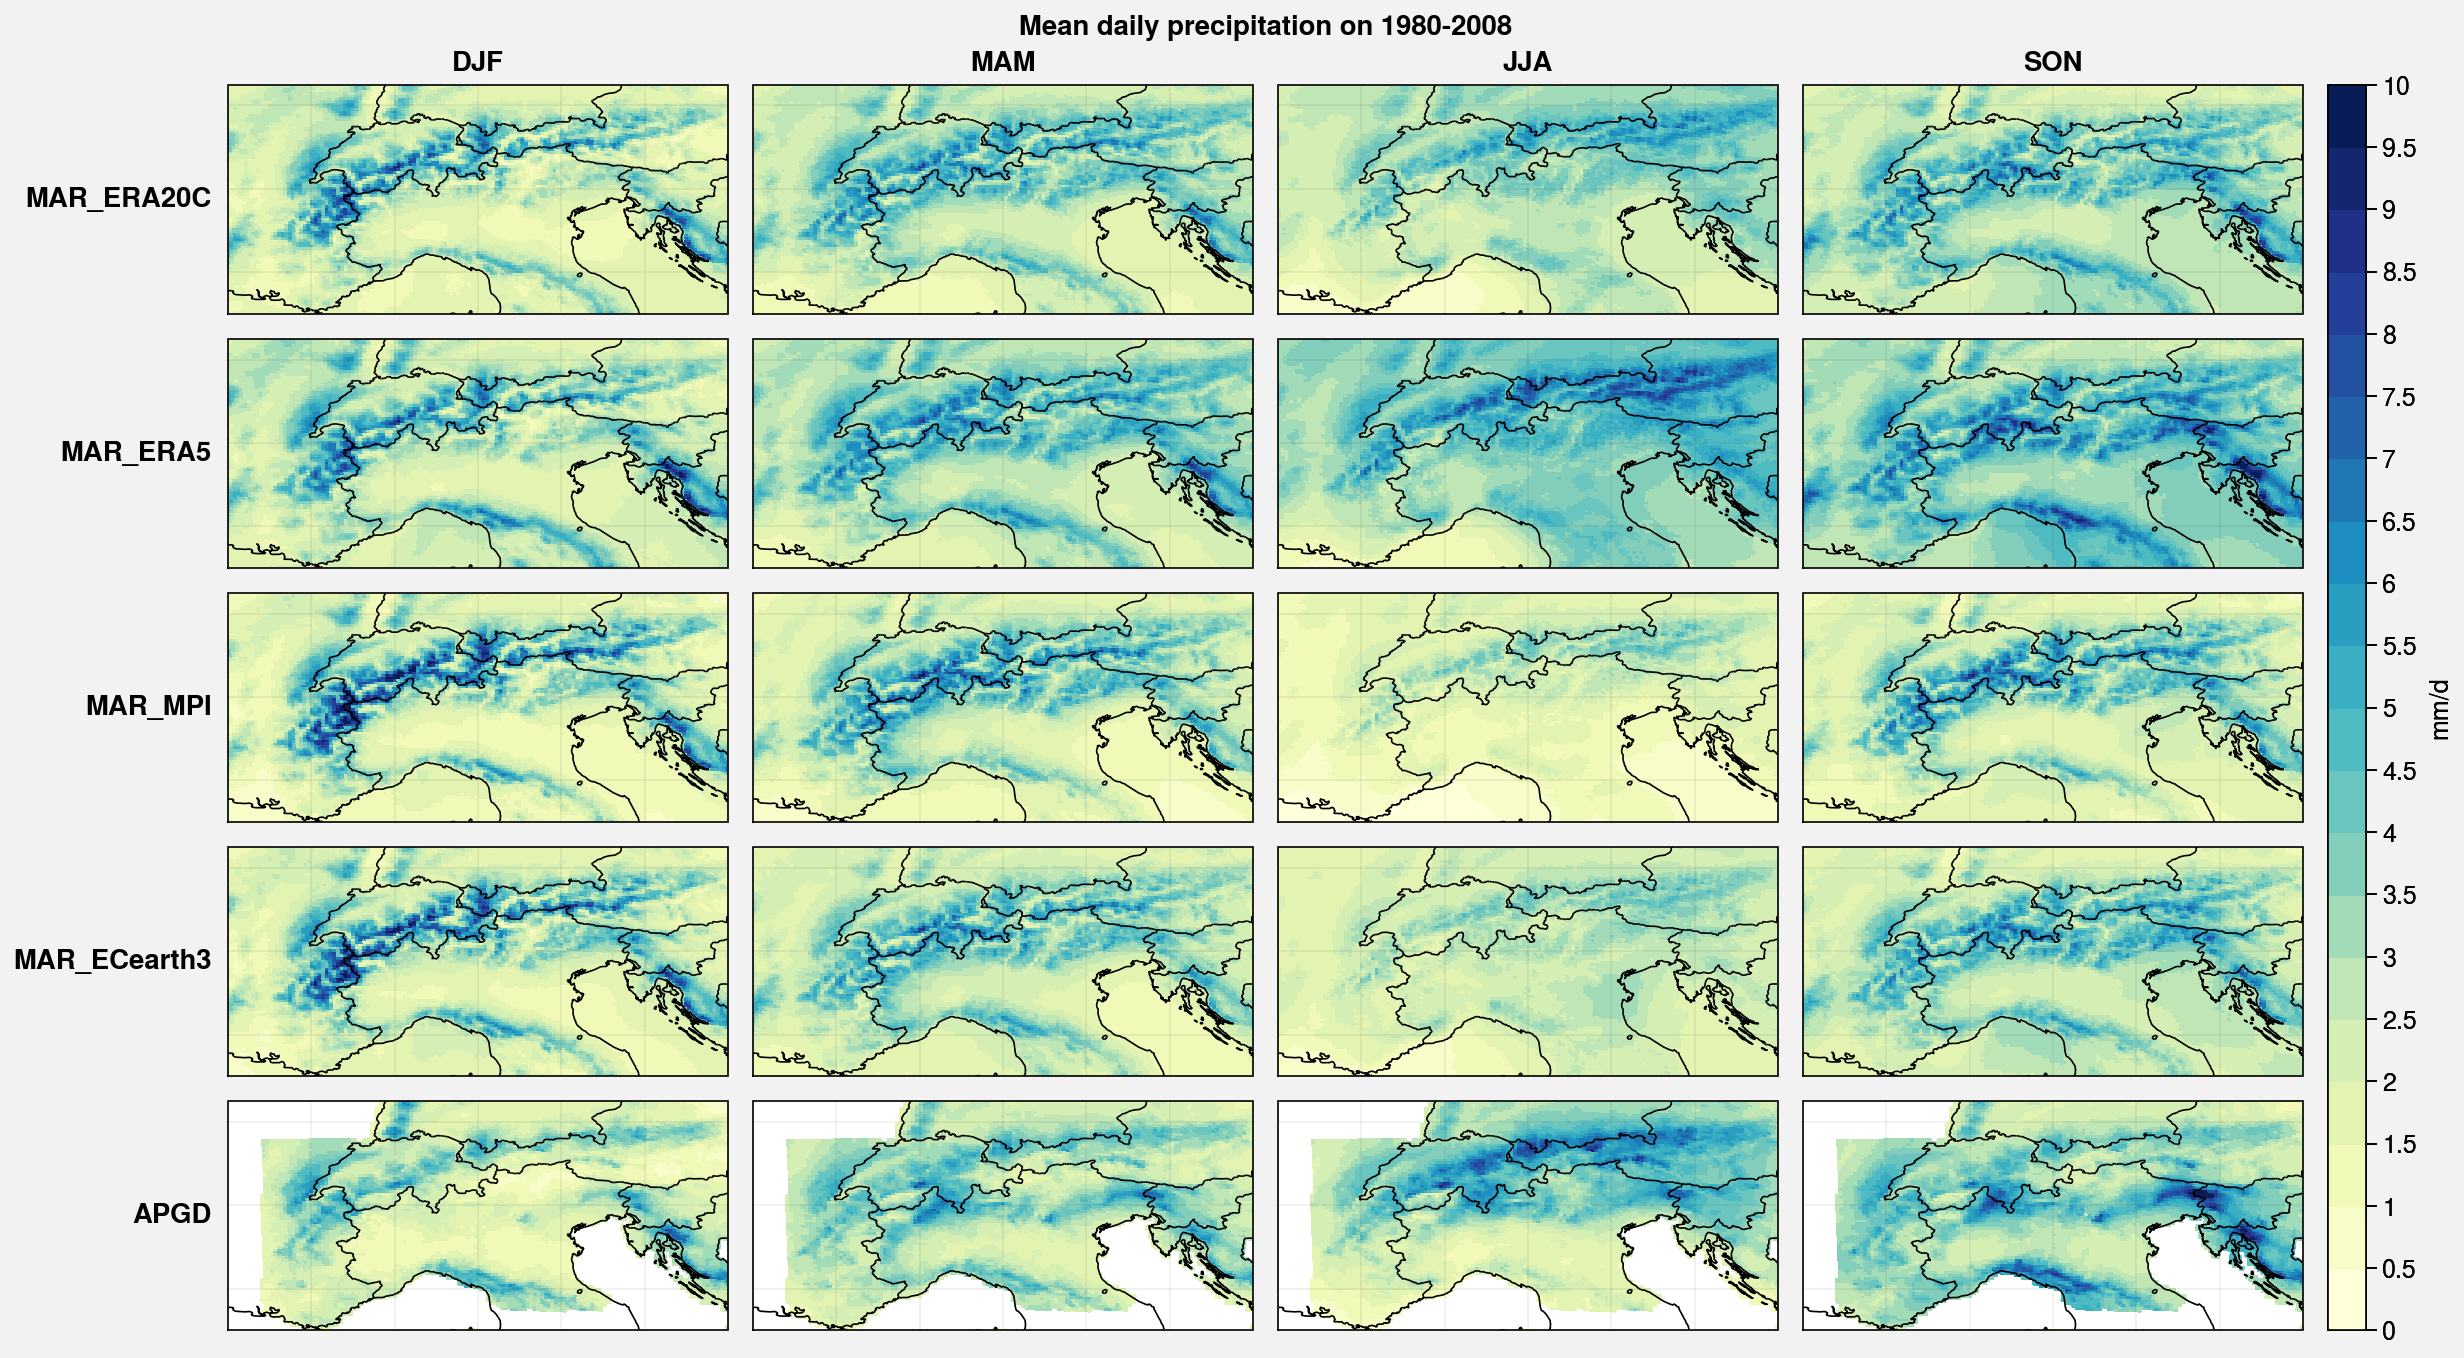

In [3]:
models = ['MAR_ERA20C','MAR_ERA5','MAR_MPI','MAR_ECearth3','APGD']
timelines = np.array([[1902,2010],[1980,2020],[1961,2100],[1961,2100],[1971,2008]])

f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=5)
for m,model in enumerate(models):
    les_season_mean = np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_mean.npy')
    y1980 = 1980 - timelines[m,0]
    y2008 = 2008 - timelines[m,0]+1
    season_mean = np.mean(les_season_mean[y1980:y2008,:,:,:],axis=0)
    
    for i in range(4):
        cb = axs[i+m*4].pcolormesh(ds.LON,ds.LAT,season_mean[i],levels=np.linspace(0,10,21),cmap='YlGnBu')

f.colorbar(cb, label= 'mm/d')

axs.format(**multiplot_format,suptitle='Mean daily precipitation on 1980-2008',collabels=['DJF','MAM','JJA', 'SON'],rowlabels=models)

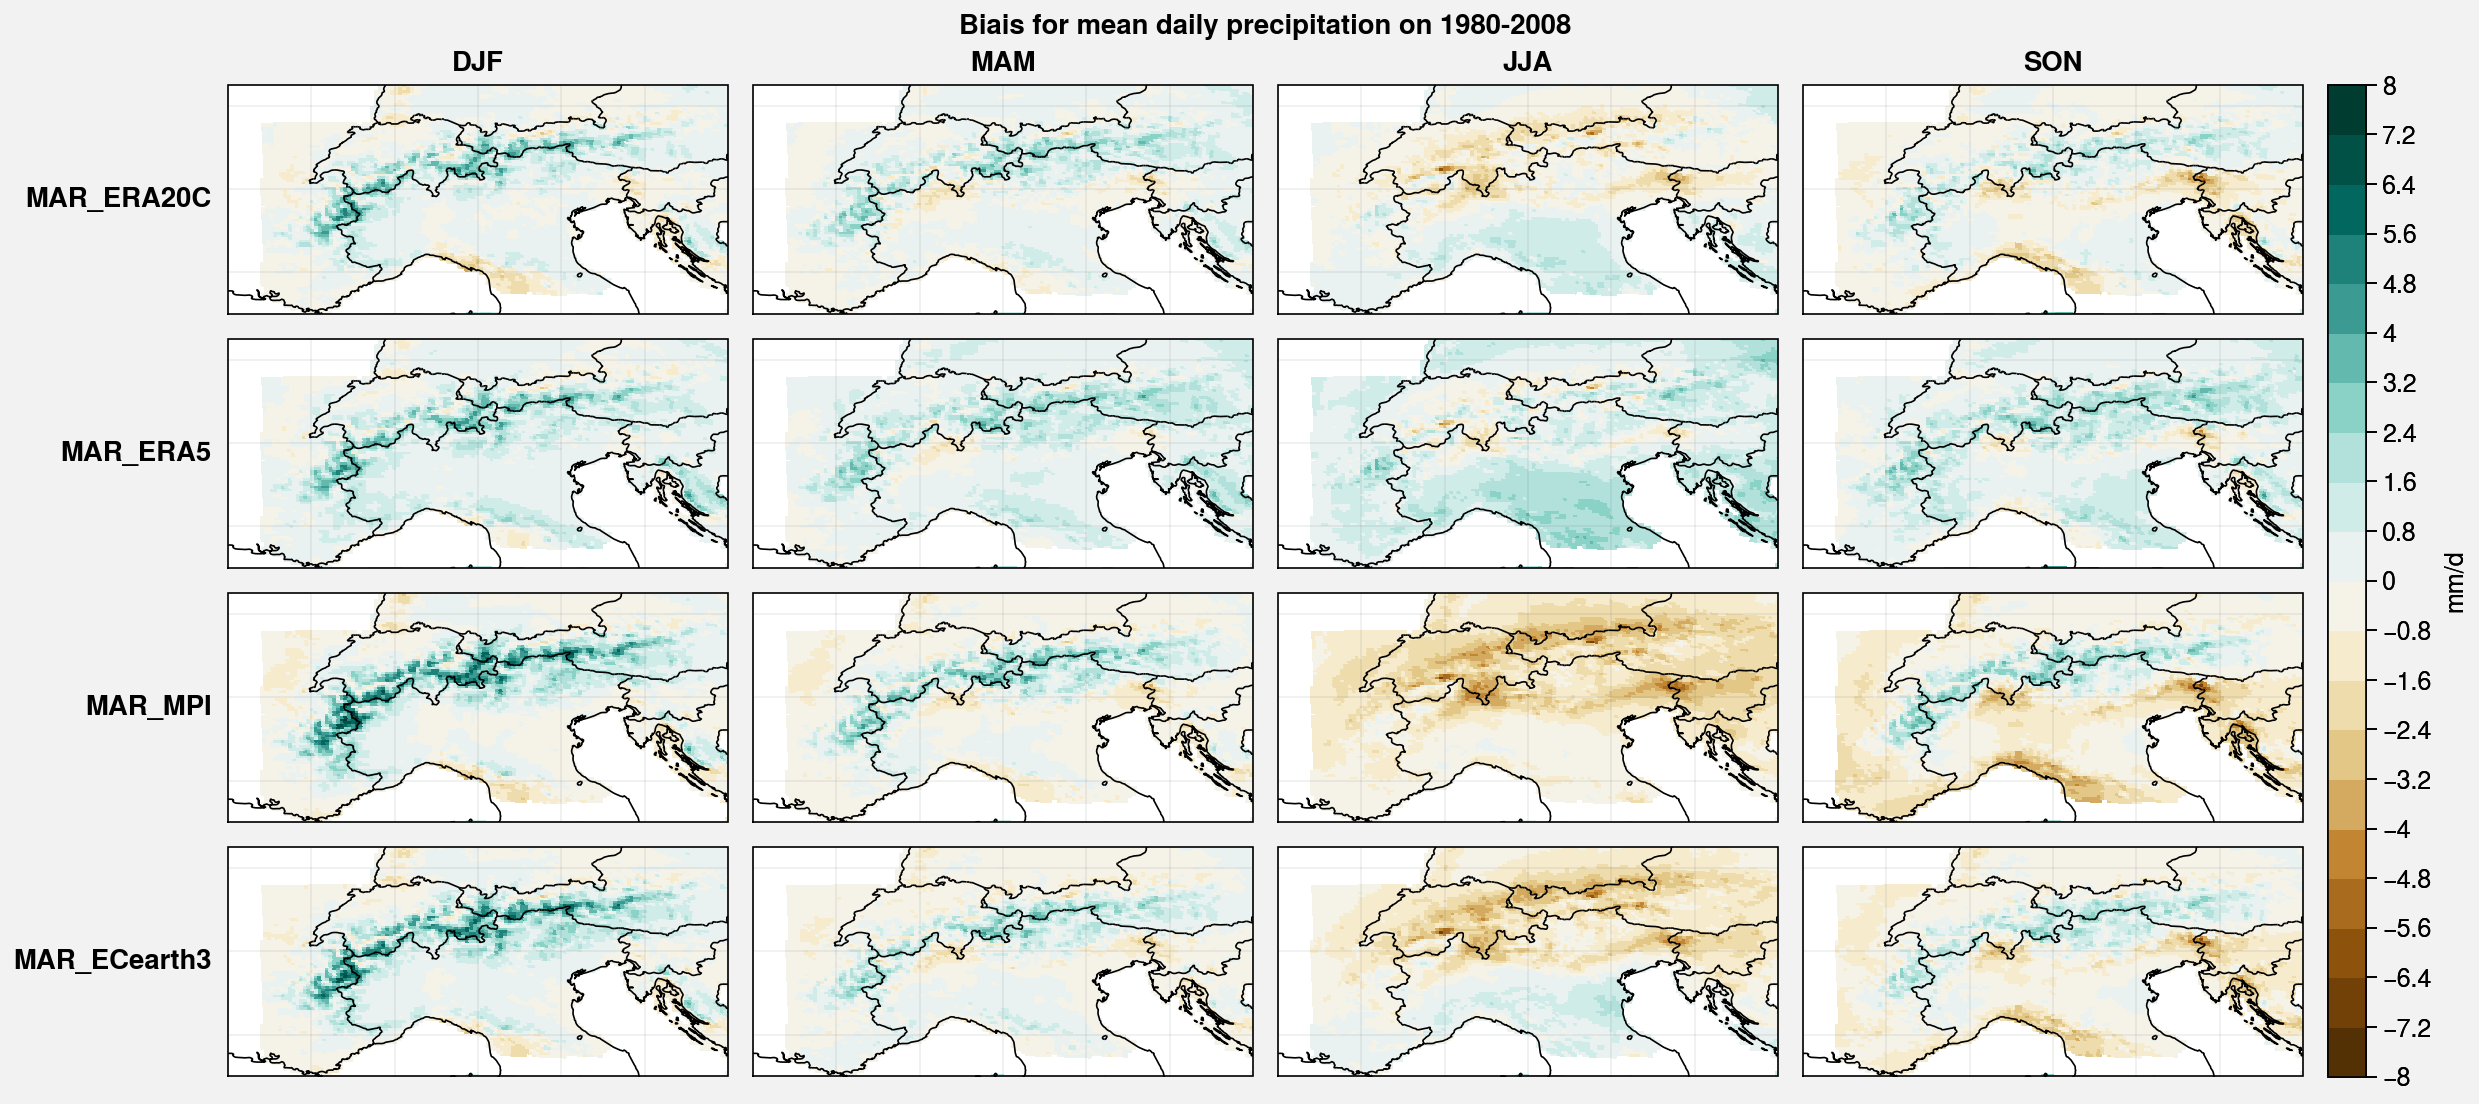

In [13]:
les_season_mean = np.load('/home/philinat/Stage-M2/saved_data_APGD/les_season_mean.npy')
APGD_season_mean = np.mean(les_season_mean[9:,:,:,:],axis=0)
models = ['MAR_ERA20C','MAR_ERA5','MAR_MPI','MAR_ECearth3']
timelines = np.array([[1902,2010],[1980,2020],[1961,2100],[1961,2100],[1971,2008]])

f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=4)
for m,model in enumerate(models):
    les_season_mean = np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_mean.npy')
    y1980 = 1980 - timelines[m,0]
    y2008 = 2008 - timelines[m,0]+1
    season_mean = np.mean(les_season_mean[y1980:y2008,:,:,:],axis=0)
    # print(y1980,y2008,np.shape(les_season_mean[y1980:y2008,:,:,:]))
    
    for i in range(4):
        cb = axs[i+m*4].pcolormesh(ds.LON,ds.LAT,season_mean[i]-APGD_season_mean[i],levels=np.linspace(-8,8,21),cmap='BrBg')

f.colorbar(cb, label= 'mm/d')

axs.format(**multiplot_format,suptitle='Biais for mean daily precipitation on 1980-2008',collabels=['DJF','MAM','JJA', 'SON'],rowlabels=models)

/tmp/ipykernel_124650/2012175419.py:17: RuntimeWarning: divide by zero encountered in true_divide
  cb = axs[i+m*4].pcolormesh(ds.LON,ds.LAT,season_mean[i]/APGD_season_mean[i],levels=np.array([0.2,0.25,0.33,0.4,0.5,0.66,0.8,1,1.25,1.5,2,2.5,3,4,5])#np.logspace(-np.log10(5),np.log10(5),15)
/tmp/ipykernel_124650/2012175419.py:17: RuntimeWarning: invalid value encountered in true_divide
  cb = axs[i+m*4].pcolormesh(ds.LON,ds.LAT,season_mean[i]/APGD_season_mean[i],levels=np.array([0.2,0.25,0.33,0.4,0.5,0.66,0.8,1,1.25,1.5,2,2.5,3,4,5])#np.logspace(-np.log10(5),np.log10(5),15)


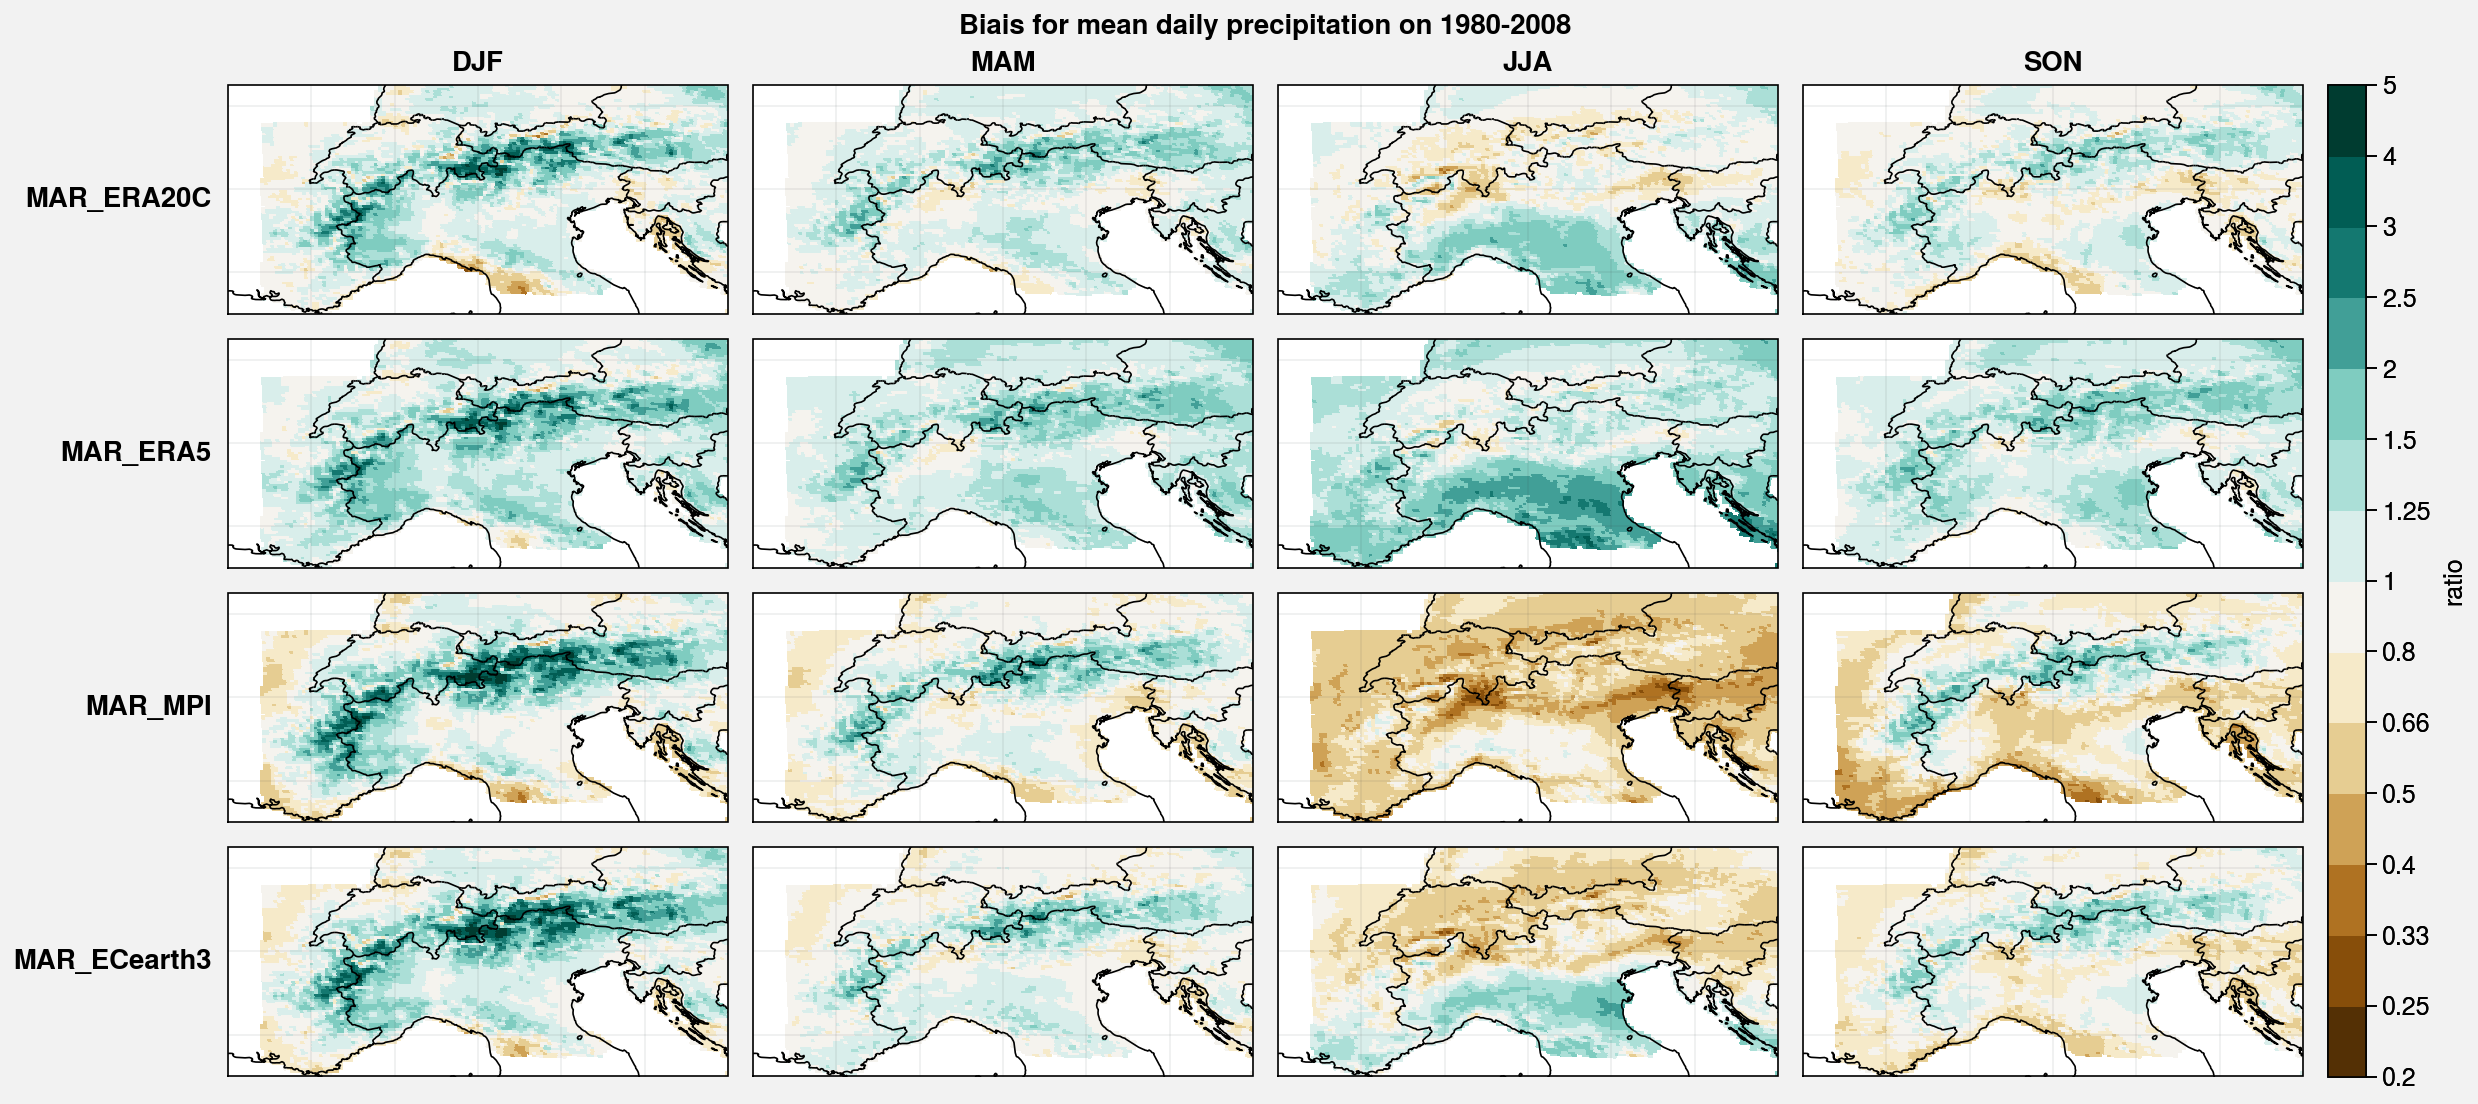

In [20]:
les_season_mean = np.load('/home/philinat/Stage-M2/saved_data_APGD/les_season_mean.npy')
APGD_season_mean = np.mean(les_season_mean[9:,:,:,:],axis=0)
# print(np.shape(les_season_mean[9:,:,:,:]))
models = ['MAR_ERA20C','MAR_ERA5','MAR_MPI','MAR_ECearth3']
timelines = np.array([[1902,2010],[1980,2020],[1961,2100],[1961,2100],[1971,2008]])

f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=4)
for m,model in enumerate(models):
    les_season_mean = np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_mean.npy')
    y1980 = 1980 - timelines[m,0]
    y2008 = 2008 - timelines[m,0]+1
    season_mean = np.mean(les_season_mean[y1980:y2008,:,:,:],axis=0)
    # print(y1980,y2008,np.shape(les_season_mean[y1980:y2008,:,:,:]))
    
    for i in range(4):
        # cb = axs[i+m*4].pcolormesh(ds.LON,ds.LAT,100*(season_mean[i]/APGD_season_mean[i]-1),levels=np.linspace(-300,300,21),cmap='BrBg')
        cb = axs[i+m*4].pcolormesh(ds.LON,ds.LAT,season_mean[i]/APGD_season_mean[i],levels=np.array([0.2,0.25,0.33,0.4,0.5,0.66,0.8,1,1.25,1.5,2,2.5,3,4,5])#np.logspace(-np.log10(5),np.log10(5),15)
                                   ,cmap='BrBg')
# f.colorbar(cb, label= '%')
f.colorbar(cb, label= 'ratio',format='%.4f')
axs.format(**multiplot_format,suptitle='Biais for mean daily precipitation on 1980-2008',collabels=['DJF','MAM','JJA', 'SON'],rowlabels=models)


In [ ]:
models = ['MAR_ERA20C','MAR_ERA5','MAR_MPI','MAR_ECearth3','APGD']
timelines = np.array([[1902,2010],[1980,2020],[1961,2100],[1961,2100],[1971,2008]])

f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=5)
for m,model in enumerate(models):
    les_season_max = np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_max.npy')
    y1980 = 1980 - timelines[m,0]
    y2008 = 2008 - timelines[m,0]+1
    season_q90 = np.quantile(les_season_max[y1980:y2008,:,:,:],0.95,axis=0)
    
    for i in range(4):
        cb = axs[i+m*4].pcolormesh(ds.LON,ds.LAT,season_q90[i],levels=np.linspace(0,200,21),cmap='YlGnBu')

f.colorbar(cb, label= 'mm/d')

axs.format(**multiplot_format,suptitle='q90 seasonal max on 1980-2008',collabels=['DJF','MAM','JJA', 'SON'],rowlabels=models)

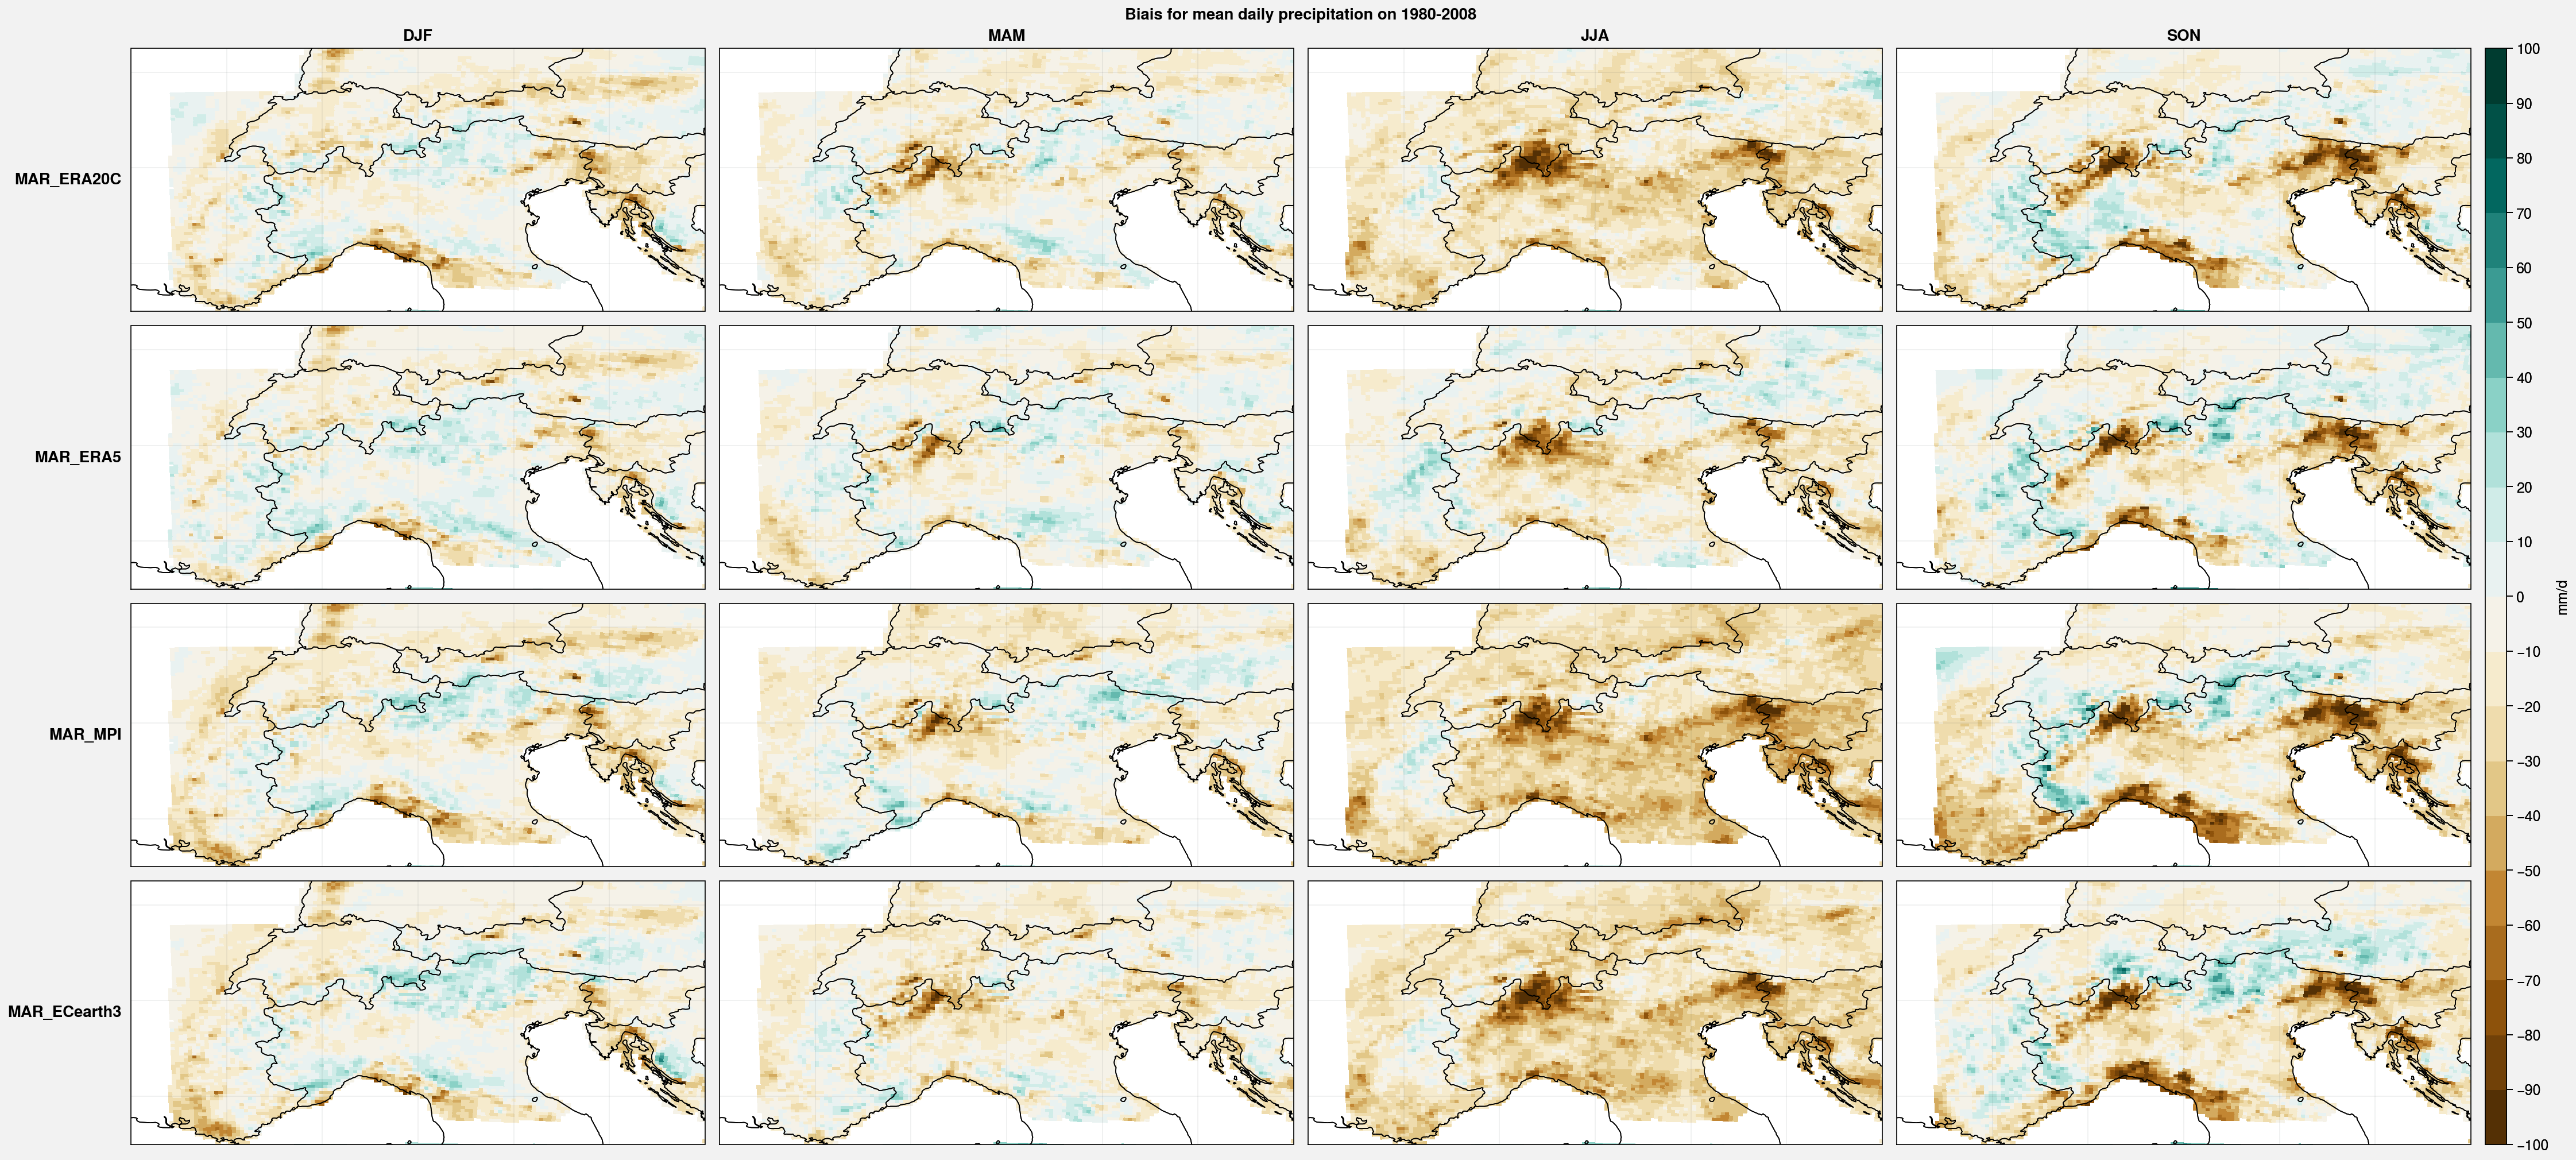

In [71]:
les_season_max = np.load('/home/philinat/Stage-M2/saved_data_APGD/les_season_max.npy')
APGD_season_q90 = np.quantile(les_season_max[9:,:,:,:],0.9,axis=0)
models = ['MAR_ERA20C','MAR_ERA5','MAR_MPI','MAR_ECearth3']
timelines = np.array([[1902,2010],[1980,2020],[1961,2100],[1961,2100],[1971,2008]])

f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=4, share=1, axwidth=5)
for m,model in enumerate(models):
    les_season_max = np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_max.npy')
    y1980 = 1980 - timelines[m,0]
    y2008 = 2008 - timelines[m,0]+1
    season_q90 = np.quantile(les_season_max[y1980:y2008,:,:,:],0.9,axis=0)
    
    for i in range(4):
        cb = axs[i+m*4].pcolormesh(ds.LON,ds.LAT,season_q90[i]-APGD_season_q90[i],levels=np.linspace(-100,100,21),cmap='BrBg')

f.colorbar(cb, label= 'mm/d')

axs.format(**multiplot_format,suptitle='Biais for mean daily precipitation on 1980-2008',collabels=['DJF','MAM','JJA', 'SON'],rowlabels=models)

/tmp/ipykernel_262819/1495546001.py:14: RuntimeWarning: divide by zero encountered in true_divide
  cb = axs[i+m*4].pcolormesh(ds.LON,ds.LAT,100*(season_q90[i]/APGD_season_q90[i]-1),levels=np.linspace(-100,100,21),cmap='BrBg')
/tmp/ipykernel_262819/1495546001.py:14: RuntimeWarning: invalid value encountered in true_divide
  cb = axs[i+m*4].pcolormesh(ds.LON,ds.LAT,100*(season_q90[i]/APGD_season_q90[i]-1),levels=np.linspace(-100,100,21),cmap='BrBg')


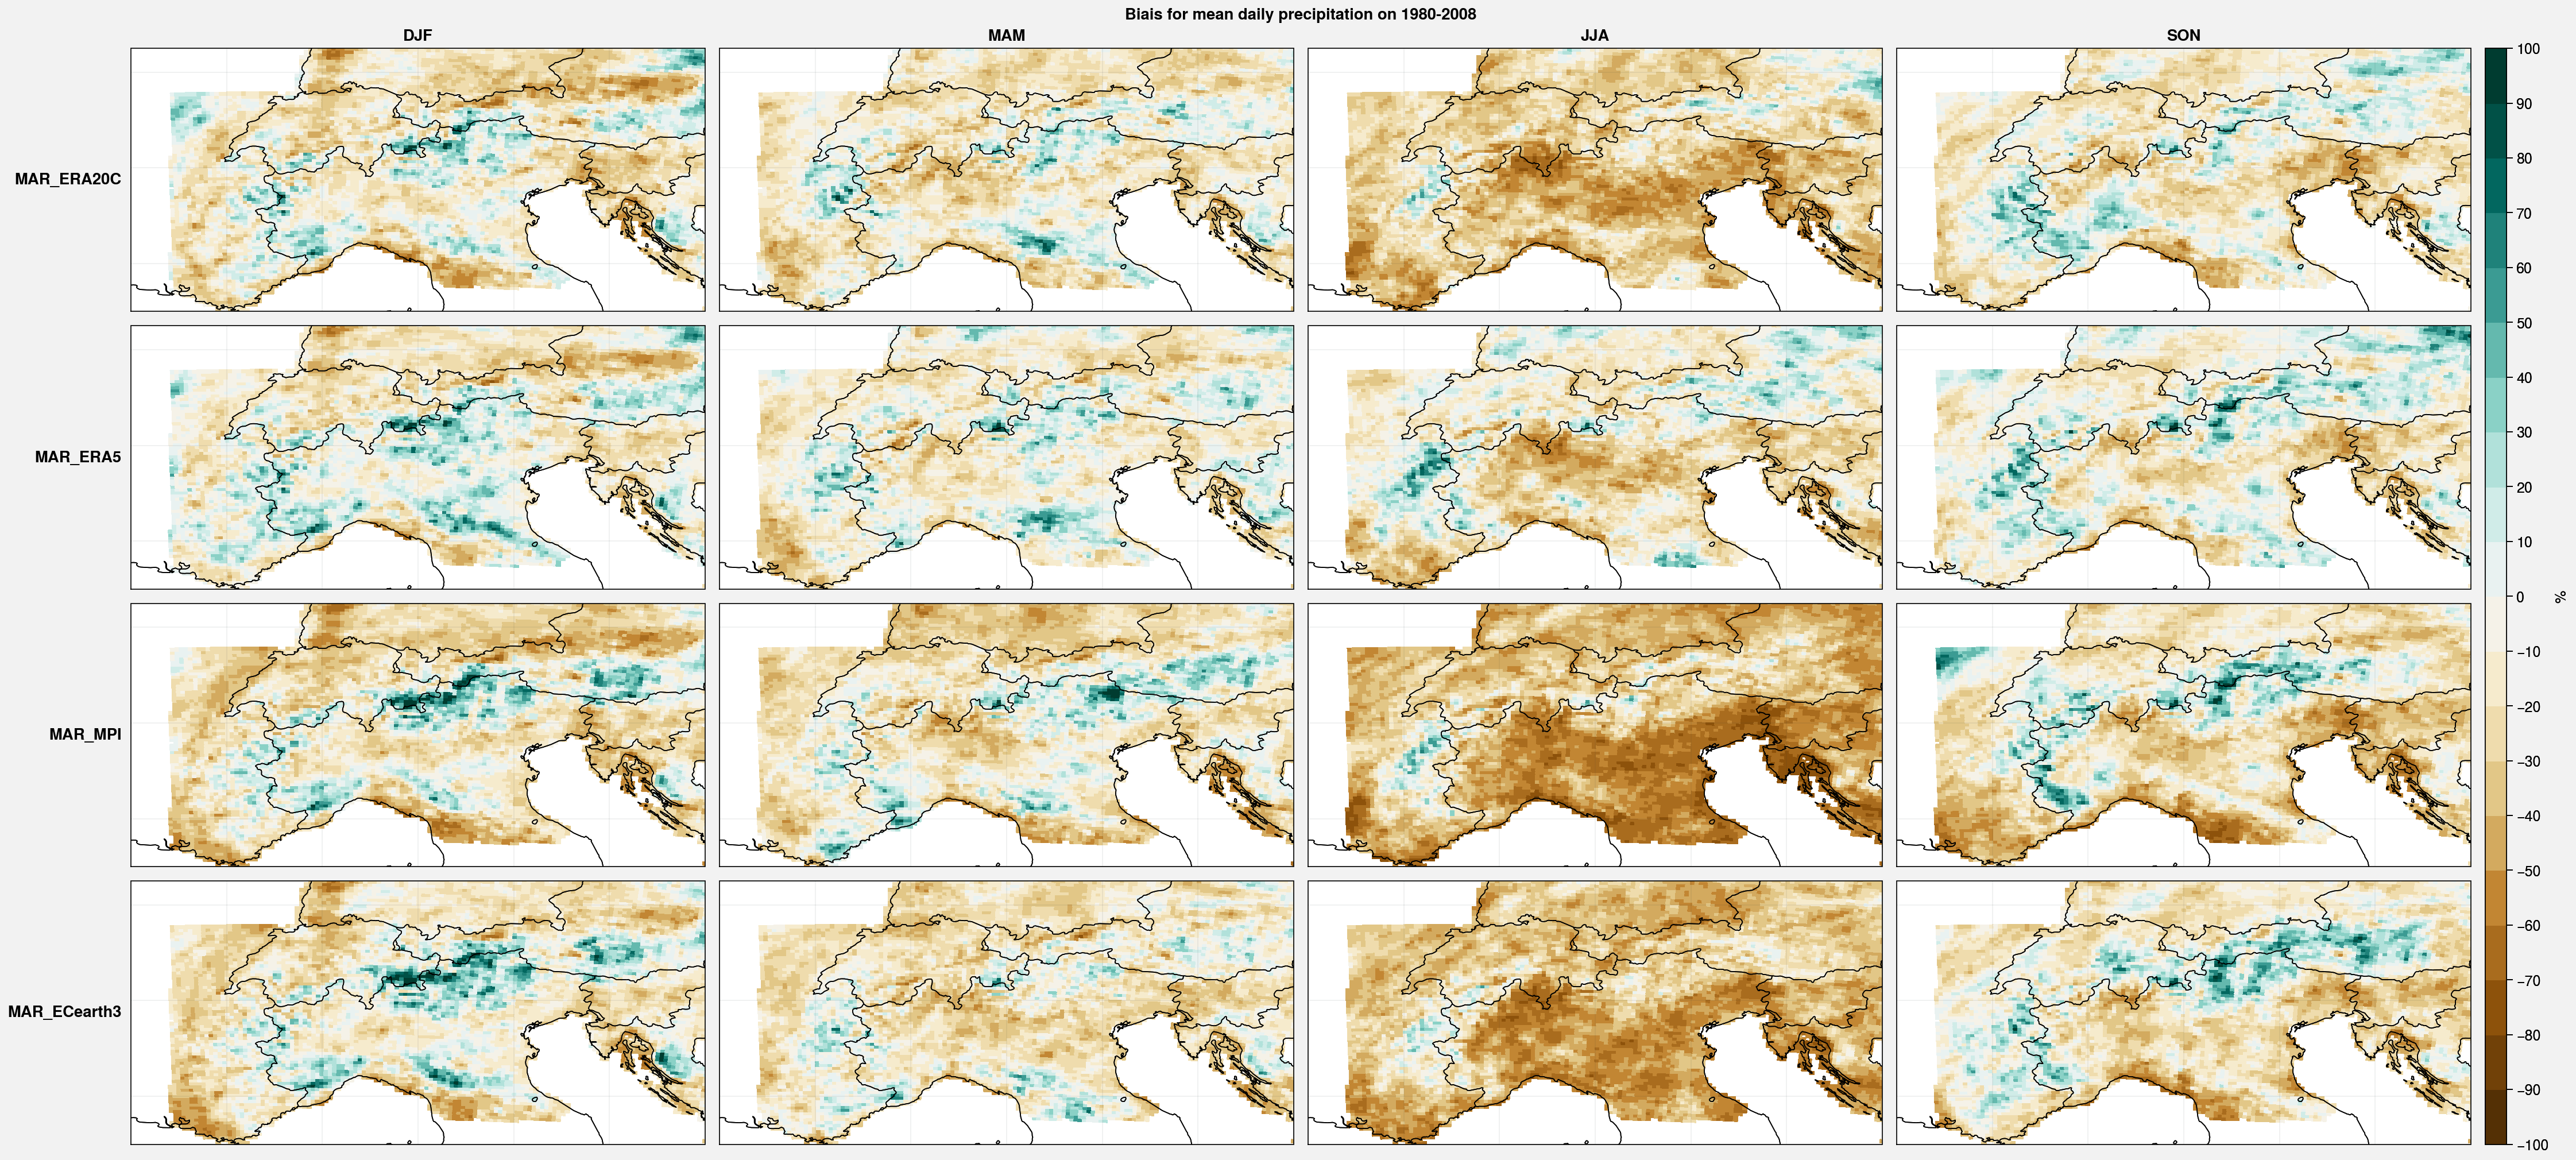

In [72]:
les_season_max = np.load('/home/philinat/Stage-M2/saved_data_APGD/les_season_max.npy')
APGD_season_q90 = np.quantile(les_season_max[9:,:,:,:],0.9,axis=0)
models = ['MAR_ERA20C','MAR_ERA5','MAR_MPI','MAR_ECearth3']
timelines = np.array([[1902,2010],[1980,2020],[1961,2100],[1961,2100],[1971,2008]])

f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=4, share=1, axwidth=5)
for m,model in enumerate(models):
    les_season_max = np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_max.npy')
    y1980 = 1980 - timelines[m,0]
    y2008 = 2008 - timelines[m,0]+1
    season_q90 = np.quantile(les_season_max[y1980:y2008,:,:,:],0.9,axis=0)
    
    for i in range(4):
        cb = axs[i+m*4].pcolormesh(ds.LON,ds.LAT,100*(season_q90[i]/APGD_season_q90[i]-1),levels=np.linspace(-100,100,21),cmap='BrBg')

f.colorbar(cb, label= '%')

axs.format(**multiplot_format,suptitle='Biais for max daily precipitation on 1980-2008',collabels=['DJF','MAM','JJA', 'SON'],rowlabels=models)